In [1]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub


/home/aditya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
labels = pd.read_csv('labels.csv')

In [3]:
labels.shape

(10222, 2)

In [4]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
# directory spliting of images according to their labels
for index, row in labels.iterrows():
    if not tf.gfile.Exists('dog_train/%s'%(row['breed'])):
        tf.gfile.MkDir('dog_train/%s'%(row['breed']))
#     print('train/%s.jpg'%(row['id']),'dog_train/%s'%(row['breed']))
    tf.gfile.Copy('train/%s.jpg'%(row['id']),'dog_train/%s/%s.jpg'%(row['breed'],row['id']),True)

In [7]:
np.array(labels['breed'].value_counts().index)

array(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed', 'tibetan_terrier', 'airedale', 'cairn',
       'leonberg', 'beagle', 'japanese_spaniel', 'blenheim_spaniel',
       'miniature_pinscher', 'australian_terrier', 'irish_wolfhound',
       'saluki', 'lakeland_terrier', 'papillon', 'whippet',
       'norwegian_elkhound', 'siberian_husky', 'pug', 'chow',
       'italian_greyhound', 'pembroke', 'ibizan_hound', 'border_terrier',
       'newfoundland', 'lhasa', 'silky_terrier', 'dandie_dinmont',
       'bedlington_terrier', 'sealyham_terrier', 'rhodesian_ridgeback',
       'irish_setter', 'old_english_sheepdog', 'boston_bull', 'collie',
       'bouvier_des_flandres', 'schipperke', 'english_foxhound', 'kelpie',
       'african_hunting_dog', 'bloodhound', 'bluetick', 'weimaraner',
       'labrador_retriever', 'saint_bernard', 'chesapeake_bay_retriever',
       'norfolk_

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
sns.set(rc={'figure.figsize':(20,8.27)})

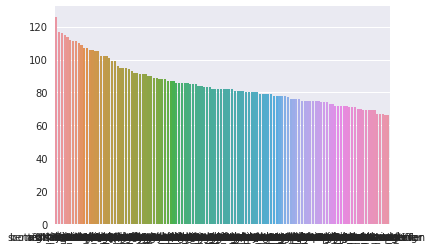

In [9]:
ax = sns.barplot(x=np.array(labels['breed'].value_counts().index), y=np.array(labels['breed'].value_counts()), orient='v')